In [ ]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-7rcnac8g
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-7rcnac8g
  Resolved https://github.com/facebookresearch/detectron2.git to commit 38af375052d3ae7331141bc1a22cfa2713b02987
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 KB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 KB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 78.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 KB 15.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# clone and install Mask2Former
!git clone https://github.com/facebookresearch/Mask2Former.git
%cd Mask2Former
!pip install -U opencv-python
!pip install git+https://github.com/mcordts/cityscapesScripts.git
!pip install -r requirements.txt
%cd mask2former/modeling/pixel_decoder/ops
!python setup.py build install
%cd ../../../../

Cloning into 'Mask2Former'...
remote: Enumerating objects: 297, done.
remote: Counting objects: 100% (293/293), done.
remote: Compressing objects: 100% (166/166), done.
remote: Total 297 (delta 126), reused 293 (delta 126), pack-reused 4
Receiving objects: 100% (297/297), 412.62 KiB | 627.00 KiB/s, done.
Resolving deltas: 100% (126/126), done.
/content/Mask2Former
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 11.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.6.0.66
    Uninstalling opencv-python-4.6.0.66:
      Successfully uninstalled opencv-python-4.6.0.66
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/mcordts/cityscapesScripts.git to /tmp/pip-req-build-857x09mx
  Running command git clone --filter=blob:none --quiet https://github.com/m

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 24.0 MB/s eta 0:00:00
/content/Mask2Former/mask2former/modeling/pixel_decoder/ops
running build
running build_py
creating build
creating build/lib.linux-x86_64-3.8
creating build/lib.linux-x86_64-3.8/modules
copying modules/__init__.py -> build/lib.linux-x86_64-3.8/modules
copying modules/ms_deform_attn.py -> build/lib.linux-x86_64-3.8/modules
creating build/lib.linux-x86_64-3.8/functions
copying functions/ms_deform_attn_func.py -> build/lib.linux-x86_64-3.8/functions
copying functions/__init__.py -> build/lib.linux-x86_64-3.8/functions
running build_ext
/usr/local/lib/python3.8/dist-packages/torch/utils/cpp_extension.py:476: UserWarning: Attempted to use ninja as the Buil

In [ ]:
!pip install faiss-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 14.5 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.autograd import Variable
from PIL import Image
import matplotlib.pyplot as plt
from torchsummary import summary
import numpy as np
import seaborn as sb
from matplotlib import cm

import cv2
import faiss
from google.colab.patches import cv2_imshow
from skimage.measure import block_reduce

In [ ]:
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)

torch:  1.13 ; cuda:  cu116


In [ ]:
%cd /content/Mask2Former
import detectron2
from detectron2.utils.logger import setup_logger

setup_logger()
setup_logger(name="mask2former")

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.data import MetadataCatalog
from detectron2.projects.deeplab import add_deeplab_config
from detectron2.data.samplers.distributed_sampler import defaultdict
cityscapes_metadata = MetadataCatalog.get("cityscapes_fine_sem_seg_train")
from scipy.stats import mode
from sklearn.neighbors import NearestNeighbors


# import Mask2Former project
from mask2former import add_maskformer2_config

/content/Mask2Former


In [ ]:
shadow_labels = [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18] 

In [ ]:
#Declare the mask2former model
cfg = get_cfg()
add_deeplab_config(cfg)
add_maskformer2_config(cfg)
cfg.merge_from_file("configs/cityscapes/semantic-segmentation/swin/maskformer2_swin_large_IN21k_384_bs16_90k.yaml")
cfg.MODEL.WEIGHTS = 'https://dl.fbaipublicfiles.com/maskformer/mask2former/cityscapes/semantic/maskformer2_swin_large_IN21k_384_bs16_90k/model_final_17c1ee.pkl'
cfg.MODEL.MASK_FORMER.TEST.SEMANTIC_ON = True
predictor = DefaultPredictor(cfg)

/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[02/21 05:10:59 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/maskformer/mask2former/cityscapes/semantic/maskformer2_swin_large_IN21k_384_bs16_90k/model_final_17c1ee.pkl ...


model_final_17c1ee.pkl: 866MB [00:49, 17.5MB/s]                           


WARNING [02/21 05:11:50 mask2former.modeling.transformer_decoder.mask2former_transformer_decoder]: Weight format of MultiScaleMaskedTransformerDecoder have changed! Please upgrade your models. Applying automatic conversion now ...


In [ ]:
class L2Norm(nn.Module):
  def __init__(self, dim=1):
    super().__init__()
    self.dim = dim

  def forward(self, input):
    return F.normalize(input, p=2, dim=self.dim)

In [ ]:
encoder_dim = 512
encoder = models.vgg16(weights=models.vgg.VGG16_Weights.DEFAULT)
encoder.cuda()
# capture only feature part and remove last relu and maxpool
layers = list(encoder.features.children())[:-2]
layers.append(L2Norm())
encoder = nn.Sequential(*layers)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [ ]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])

transform_pipeline = transforms.Compose([
        # transforms.RandomResizedCrop(224), DOES IT HAVE TO BE DONE?
        # transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize,
])

In [ ]:
def countless(data):
  """
  Vectorized implementation of downsampling a 2D 
  image by 2 on each side using the COUNTLESS algorithm.
  
  data is a 2D numpy array with even dimensions.
  """
  # allows us to prevent losing 1/2 a bit of information 
  # at the top end by using a bigger type. Without this 255 is handled incorrectly.
  data, upgraded = upgrade_type(data) 

  data = data + 1 # don't use +=, it will affect the original data.

  sections = []
  
  # This loop splits the 2D array apart into four arrays that are
  # all the result of striding by 2 and offset by (0,0), (0,1), (1,0), 
  # and (1,1) representing the A, B, C, and D positions from Figure 1.
  factor = (2,2)
  for offset in np.ndindex(factor):
    part = data[tuple(np.s_[o::f] for o, f in zip(offset, factor))]
    sections.append(part)

  a, b, c, d = sections

  ab_ac = a * ((a == b) | (a == c)) # PICK(A,B) || PICK(A,C) w/ optimization
  bc = b * (b == c) # PICK(B,C)

  a = ab_ac | bc # (PICK(A,B) || PICK(A,C)) or PICK(B,C)
  result = a + (a == 0) * d - 1 # (matches or d) - 1

  if upgraded:
    return downgrade_type(result)

  return result

def upgrade_type(arr):
  dtype = arr.dtype

  if dtype == np.uint8:
    return arr.astype(np.uint16), True
  elif dtype == np.uint16:
    return arr.astype(np.uint32), True
  elif dtype == np.uint32:
    return arr.astype(np.uint64), True

  return arr, False
  
def downgrade_type(arr):
  dtype = arr.dtype

  if dtype == np.uint64:
    return arr.astype(np.uint32)
  elif dtype == np.uint32:
    return arr.astype(np.uint16)
  elif dtype == np.uint16:
    return arr.astype(np.uint8)
  
  return arr

In [ ]:
a = b = 100

def customSoftmax(x, shadow, informative):
  informativeScore = np.sum(np.exp(-1 * b * np.linalg.norm(x - informative) ** 2))
  shadowScore = np.sum(np.exp(-1 * b * np.linalg.norm(x - shadow) ** 2))
  # print(informativeScore, shadowScore)
  return informativeScore / (informativeScore + shadowScore)

def customAlpha(x, centroids):
  return np.exp(-1 * a * np.linalg.norm(x - centroids, axis = 1)) / np.exp(-1 * a * np.linalg.norm(x - centroids, axis = 1)).sum()

In [ ]:
def generateWeights(image):
  imgTest = cv2.imread(image)
  outputs = predictor(imgTest)
  labels = np.array(outputs["sem_seg"].argmax(0).to("cpu"))

  img = Image.fromarray(imgTest)
  img = transform_pipeline(img)
  img = img.unsqueeze(0)  
  img = Variable(img)

  img = img.cuda()
  encoder.eval()
  with torch.no_grad():
    VGG16Output = encoder(img)
  
  inputs_in_3d = torch.transpose(torch.squeeze(VGG16Output), 0, 2)
  inputs = inputs_in_3d.reshape([-1, inputs_in_3d.shape[-1]]).cpu()

  km = faiss.Kmeans(512, 128, niter = 16)
  inputs = inputs.numpy()
  km.train(inputs)

  # index = faiss.IndexFlatL2(512)
  # index.add(km.centroids)
  # distances, clusterAssignment = index.search(inputs, 1)

  nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(km.centroids)
  distances, clusterAssignment = nbrs.kneighbors(inputs)

  noOfInformative = 1
  noOfShadow = 4
  
  while labels.shape > (30, 40):
    labels = countless(labels)

  labels = labels.flatten()
  clusterAssignment = clusterAssignment.flatten()
  
  clusters = defaultdict(list)
  for label, point, clusterId in zip(labels, inputs, clusterAssignment):
    clusters[clusterId].append((point, label))
 
  for clusterId, elements in clusters.items():
    # Collect the informative and shadow centroids in the cluster
    informativeInCluster = []
    shadowInCluster = []
    for point, label in elements:
      (informativeInCluster, shadowInCluster)[label in shadow_labels].append(point)

    # Adjustments as described above
    if not informativeInCluster:
      informativeInCluster.append([0] * 512)
    if not shadowInCluster:
      shadowInCluster.append([0] * 512)
    
    # Finding the centroids
    informativeCentroids = np.array(informativeInCluster)
    if len(informativeInCluster) > noOfInformative:
      nbrs = NearestNeighbors(n_neighbors=noOfInformative, algorithm='ball_tree').fit(informativeInCluster)
      distances, indices = nbrs.kneighbors(km.centroids[clusterId].reshape(1, -1))
      informativeCentroids = informativeCentroids[list(indices[0])]

    shadowCentroids = np.array(shadowInCluster)
    if len(shadowInCluster) > noOfShadow:
      nbrs = NearestNeighbors(n_neighbors=noOfShadow, algorithm='ball_tree').fit(shadowInCluster)
      distances, indices = nbrs.kneighbors(km.centroids[clusterId].reshape(1, -1))
      shadowCentroids = shadowCentroids[list(indices[0])]
      # break
      # kMeans = faiss.Kmeans(512, 4, niter = 16)
      # kMeans.train(np.array(shadowCentroids))
      # shadowCentroids = kMeans.centroids

    clusters[clusterId] = [shadowCentroids, informativeCentroids]

    # for point, label, location in elements:
    #   # Append the weight for this particular point
    #   # print(label, end=" ")
    #   weight = customSoftmax(point, shadowCentroids, informativeCentroids)
    #   weights.append((weight, location))

  weights = []
  for input in inputs:
    weight = 0
    for i, customAlphaVal in enumerate(customAlpha(input, km.centroids)):
      weight = weight + (customAlphaVal * customSoftmax(input, clusters[i][0], clusters[i][1]) * (input - km.centroids[i])) #  
    # print(weight.shape)
    weights.append(np.linalg.norm(weight)) # weight
  
  # weightsSorted = sorted(weights, key=lambda x: x[1])
  # weightsSorted = [weight for weight, location in weightsSorted]

  # Reshape the weights to the size of the output
  # weights = np.array(weightsSorted)
  weights = np.array(weights)
  weights = weights.reshape((30,40))
  return weights

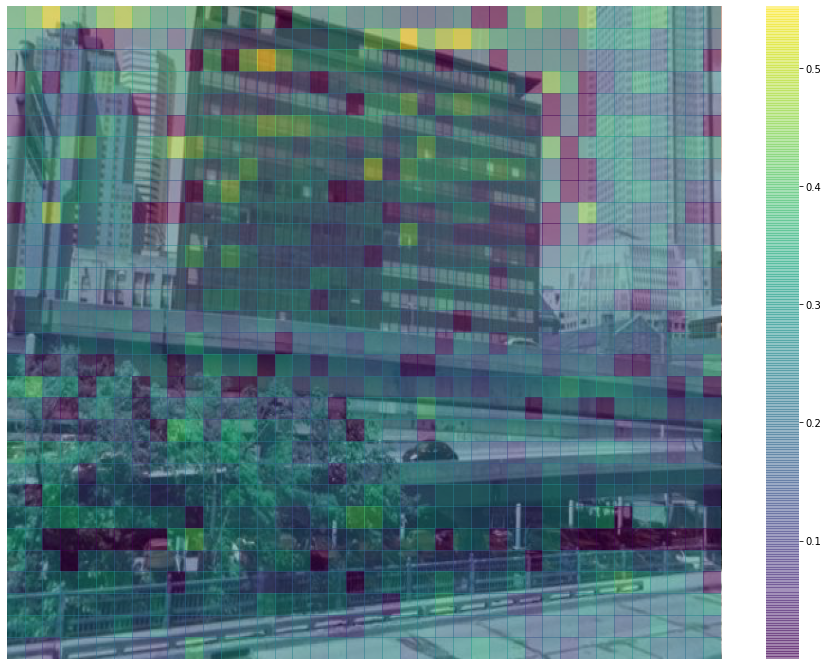

In [ ]:
weights = generateWeights("/content/002998_pitch1_yaw11.jpg")
imgTest = cv2.imread("/content/002998_pitch1_yaw11.jpg")
fig, ax = plt.subplots(figsize=(16,12))
sb.heatmap(weights,ax=ax, alpha = 0.5, zorder = 2,  cmap="viridis", cbar = True)
ax.imshow(imgTest, aspect = ax.get_aspect(),
          extent = ax.get_xlim() + ax.get_ylim(),
          zorder = 1)
ax.axis('off')
plt.savefig('heatmap1.png', bbox_inches='tight', pad_inches=0)